<font color="navyblue">
<center>
<h1>Univariate Linear Regression on the Scikit-Learn Diabetes Dataset</h1>

<h2>Practical Lab 3 </h2><center></font>
Submitted by Beena Kurian(student ID: 8946601)


<font color="navyblue">
<h3>OBJECTIVES</h3>
</font>

<ul>
<li>To use Univariate Linear Regression model on the scikit learn diabetes dataset. </li>
<li>Compute the slope(m) and y-intercept(b) will be determined from the data through statistical techniques.</li>
<li>Compute the loss on the train and test datasets</li>
<li>To find the best-fit line that describes the relationship between BMI and disease progression</li>
</ul>

In [2]:
# Import necessary libraries
import numpy as np
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt  

<font color="navyblue">
<h4>1. FRAME THE PROBLEM AND LOOK AT THE BIG PICTURE</h4>
</font>
The primary goal of this analysis is to determine whether there is a significant correlation between Body Mass Index (BMI) and disease progression.

Understanding this relationship can have implications for healthcare and medical interventions. 

For example, it may help to identify whether BMI plays a role in predicting the progression of a specific disease.

Here, the problem is to find the relationship between one independent variable (BMI) and one dependent variable (disease progression).


<font color="navyblue">
<h4>2. GET THE DATA</h4>
</font>

From sklearn import datasets and then load diabetes dataset

In [3]:

# to load the diabetes dataset from scikit-learn while simultaneously splitting it into two parts:
from sklearn import datasets
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True, as_frame=True)

In [4]:
#To display few rows of diabetes_X DataFrame
print(diabetes_X.head())

        age       sex       bmi        bp        s1        s2        s3   
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401  \
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  
0 -0.002592  0.019907 -0.017646  
1 -0.039493 -0.068332 -0.092204  
2 -0.002592  0.002861 -0.025930  
3  0.034309  0.022688 -0.009362  
4 -0.002592 -0.031988 -0.046641  


In [5]:
#To display few rows of diabetes_y DataFrame
print(diabetes_y.head())

0    151.0
1     75.0
2    141.0
3    206.0
4    135.0
Name: target, dtype: float64


Extract the 'bmi' column from the dataset

In [18]:
# extracting the independent variable bmi from diabetes_X and then reshape it
bmi_feature = diabetes_X['bmi']

# independent variable X
X = bmi_feature.values.reshape(-1,1)

# dependent variable X
y = diabetes_y

<font color="navyblue">
<h4>3. EXPLORE THE DATA TO GAIN INSIGHTS</h4>
</font>

It involves investigating and visualizing the dataset to better understand its characteristics, patterns, and relationships between variables

Plotting histogram and Calculating mean, median, standard deviation, minimum and maximum values of independent variable-to get insights about bmi

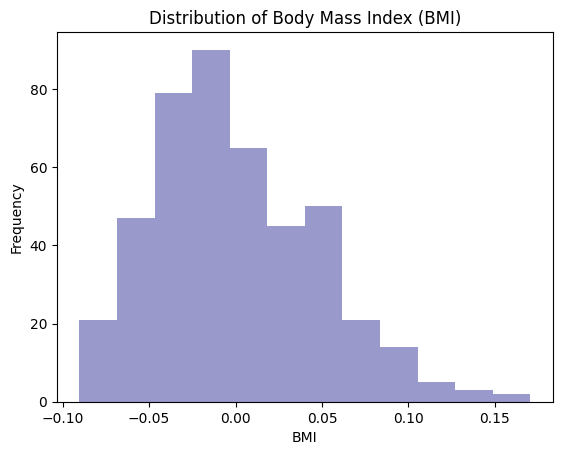

Mean: -2.2455642172282577e-16
Median: -0.007283766209687899
Standard Deviation: 0.0475651494154494
Minimum Value: -0.09027529589850945
Maximum Value: 0.17055522598064407


In [7]:
plt.hist(X,color="navy",alpha=0.4, bins= 12)
plt.title("Distribution of Body Mass Index (BMI)")
plt.xlabel("BMI")
plt.ylabel("Frequency")
plt.show()
print("Mean:", np.mean(X))
print("Median:", np.median(X))
print("Standard Deviation:", np.std(X))
print("Minimum Value:", np.min(X))
print("Maximum Value:", np.max(X))


<ul>
<li>Mean (Average): The mean value being very close to zero, the values in the dataset are very close to zero. 
In a balanced dataset, the mean is often close to zero.</li>

<li>Median (Middle Value): The median value is also close to zero, indicating that the dataset has a roughly symmetrical distribution. 
The median is less sensitive to extreme outliers compared to the mean.</li>

<li>Standard Deviation: The standard deviation measures the spread or dispersion of the data. A smaller standard deviation suggests that the data points are relatively close to the mean, indicating lower variability in the dataset.</li>

<li>Minimum Value: The minimum value (-0.0903) represents the lowest data point in the dataset.
</li>

<li>Maximum Value: The maximum value (0.1706) represents the highest data point in the dataset.</li>

VISUALIZE THE RELATIONSHIP BETWEEN BMI AND DISEASE PROGRESSION USING SCATTER PLOT

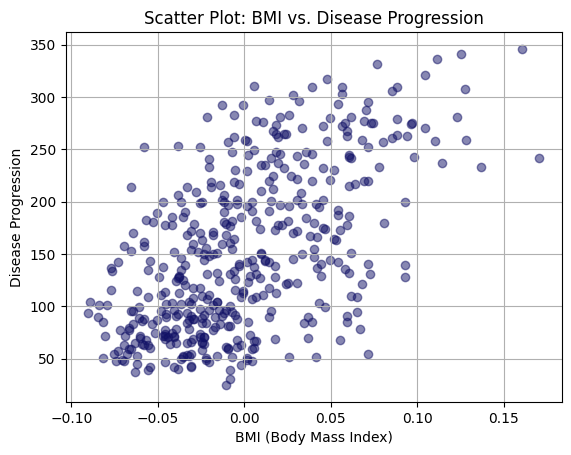

In [8]:
# Create a scatter plot
plt.scatter(X, y, color="#111166",alpha=0.5)
plt.xlabel("BMI (Body Mass Index)")
plt.ylabel("Disease Progression")
plt.title("Scatter Plot: BMI vs. Disease Progression")
plt.grid(True)  
plt.show()


In this scatter plot, each data point represents a data sample. 

The points are scattered upward from left to right indicates a positive correlation between BMI (Body Mass Index) and Disease Progression. 

This means that as BMI increases, Disease Progression tends to increase as well.

COMPUTE CORRELATION MATRIX

In [19]:
# compute correlation matrix
correlation_matrix = np.corrcoef(bmi_feature, y)
print(correlation_matrix)


[[1.         0.58645013]
 [0.58645013 1.        ]]


The off-diagonal elements (top-right and bottom-left) represent the correlation between bmi and disease progression(X and y). 

This value is between -1 and 1 and indicates the strength and direction of the linear relationship between x and y.

    A value of 1.0 would indicate a perfect positive linear relationship, meaning that as one variable increases, the other increases proportionally.
    A value of -1.0 would indicate a perfect negative linear relationship, meaning that as one variable increases, the other decreases proportionally.
    A value close to 0 (as in this case) indicates a relatively weak linear relationship.

Here, bmi and disease progression, variables have a positive correlation of approximately 0.586.
The correlation is not perfect but indicates a moderate positive linear relationship between the two variables.

BOX PLOT OF BMI 

The box plot provides an overall sense of the data's distribution, including its central tendency, spread, and presence of potential outliers.

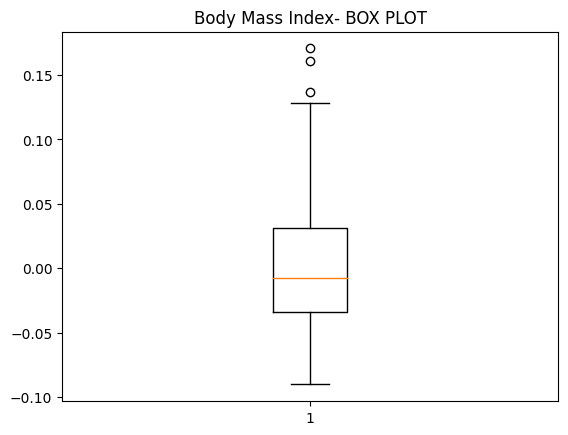

In [25]:
#Box plot showing distribution of BMI
plt.boxplot(X)
plt.title("Body Mass Index- BOX PLOT")
plt.show()

The box plot reveals the presence of data points that fall beyond the higher whiskers, indicating outliers.

<font color="navyblue">
<h4>4. FINE-TUNE YOUR MODELS AND COMBINE THEM INTO A GREAT SOLUTION</h4>
</font>

First split the dataset into training and testing. This helps to assess our model's performance on data it hasn't seen during training, which is important for evaluating its generalization capabilities. Then train the model.

In [26]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,diabetes_y, test_size=0.2, random_state=0)

# Train the model
model = LinearRegression()  
model.fit(X_train, y_train)

LinearRegression()

<font color="navyblue">
<H4>5.PRESENT YOUR SOLUTION</H4>
</font>

 Model's parameters (slope and intercept)

In [12]:
# The coefficients
print('Coefficient or slope, m: \n', model.coef_)
print('Intercept, b: \n', model.intercept_)

Coefficient or slope, m: 
 [981.65543614]
Intercept, b: 
 152.28824927379569


The coefficient indicates the change in the dependent variable y (the target) for a one-unit change in the independent variable X, assuming all other variables are held constant. 
In simpler terms, for each unit increase in the independent variable X, the predicted value of the target variable y increases by 981.65543614 units.
The intercept, represents the predicted value y of the dependent variable x when all independent variables are set to zero. 
In the result, the intercept is 152.28824927379569.

MAKE PREDICTIONS USING TRAINING AND TESTING DATASET

In [13]:
# Make training predictions using the training set
y_train_pred = model.predict(X_train)

In [14]:
# Make predictions using the testing set
y_pred = model.predict(X_test)

EVALUATING MODEL PERFORMANCE USING - MAE and MSE

MSE and MAE measure the error between the actual and predicted values. Lower values indicate better model performance.

LOSS ON TRAIN DATASETS

In [15]:
# Calculate the error MAE and MSE on train datasets
print('Mean Absolute Error: %.2f' % metrics.mean_absolute_error(y_train, y_train_pred))
print('Mean Squared Error: %.2f' % metrics.mean_squared_error(y_train, y_train_pred))

Mean Absolute Error: 51.32
Mean Squared Error: 3827.82


LOSS ON TEST DATASETS

In [16]:
# Calculate the error MAE and MSE on test datasets
print('Mean Absolute Error: %.2f' % metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error: %.2f' % metrics.mean_squared_error(y_test, y_pred))

Mean Absolute Error: 52.94
Mean Squared Error: 4150.68


MSE measures the average of the squared differences between the predicted values and the actual values.
MAE measures the average of the absolute differences between the predicted values and the actual values.

High value of MSE indicates the model is performing poorly. 
MSE gives higher weight to large errors, making it sensitive to outliers.



SCATTER PLOTS AND PREDICTION LINE

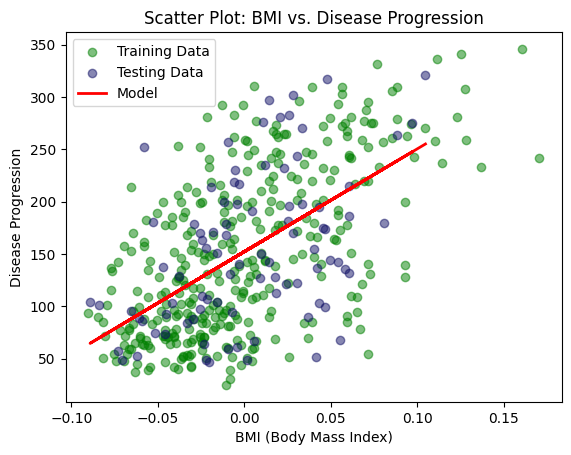

In [17]:
# Plot training, testing, and prediction outputs
plt.scatter(X_train, y_train,color="green",alpha=0.5, label='Training Data')
plt.scatter(X_test, y_test,color="#111166",alpha=0.5 , label='Testing Data')
plt.plot(X_test, y_pred, linewidth=2, color="red", label= 'Model')
plt.xlabel("BMI (Body Mass Index)")
plt.ylabel("Disease Progression")
plt.title("Scatter Plot: BMI vs. Disease Progression")
plt.legend()
plt.show()


**MY OBSERVATIONS AND TAKE AWAYS:**
<ul>
<li>
Loss on Train and Test Datasets:

    Train MSE: 3827.82 , Test MSE: 4150.68  
    Train MAE: 51.32 , Test MAE: 52.94
    If MSE and MAE are smaller, then the model will perform well. The model is having high values, so, the performance will be poor.
</li>
<li>
Moderate Correlation:

    The correlation between BMI and Disease Progression is relatively weak. 
    This implies that while there is a positive relationship, BMI alone may not be a strong predictor of Disease Progression in this dataset.
</li>
<li>
Linear Regression Model Results:
    <ol>
    <li> Slope (Coefficient)--> 981.65543614 :The positive slope coefficient (approximately 981.66) suggests a direct relationship between Body Mass Index (BMI) and Disease Progression. As BMI increases, Disease Progression tends to increase, indicating a positive correlation.</li>
    <li> Intercept--> 152.28824927379569: The intercept (approximately 152.29) represents the predicted value of Disease Progression when BMI is zero.</li>
    </ol>  
</li>
<li>
It may be beneficial to explore additional features or consider alternative modeling approaches to improve predictive accuracy. 
</li>
<ul>